**Serie Temporal 2**

Instalamos algunos nuevos paquetes que nos serán de mucha utilidad para visualización

In [1]:
!pip install mplfinance

     |████████████████████████████████| 61kB 3.1MB/s 


In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.3MB/s 


### Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Conecta Plotly con Pandas

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Cargamos los datos

Como en el caso anterior, existen muchos tipos de datos que nos podemos descargar de google finanzas

In [5]:
# Para este caso usaremos los datos de amazon
df_1 = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)
# Verify the index is a DatetimeIndex
df_1.index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

In [6]:
df_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-16,1773.33,1786.24,1770.52,1777.43,1777.43,2763400
2019-10-17,1796.49,1798.85,1782.02,1787.48,1787.48,2647400
2019-10-18,1787.80,1793.98,1749.20,1757.51,1757.51,3362500
2019-10-21,1769.66,1785.88,1765.00,1785.66,1785.66,2130400
2019-10-22,1788.15,1789.78,1762.00,1765.73,1765.73,2111700


In [7]:
df_1['Open']

Date
2019-10-16    1773.33
2019-10-17    1796.49
2019-10-18    1787.80
2019-10-21    1769.66
2019-10-22    1788.15
               ...   
2020-10-09    3210.00
2020-10-12    3349.94
2020-10-13    3467.99
2020-10-14    3447.00
2020-10-15    3292.01
Name: Open, Length: 253, dtype: float64

### Visualizaciones
Usaremos matplot y seaborn como dos posibles alternativas

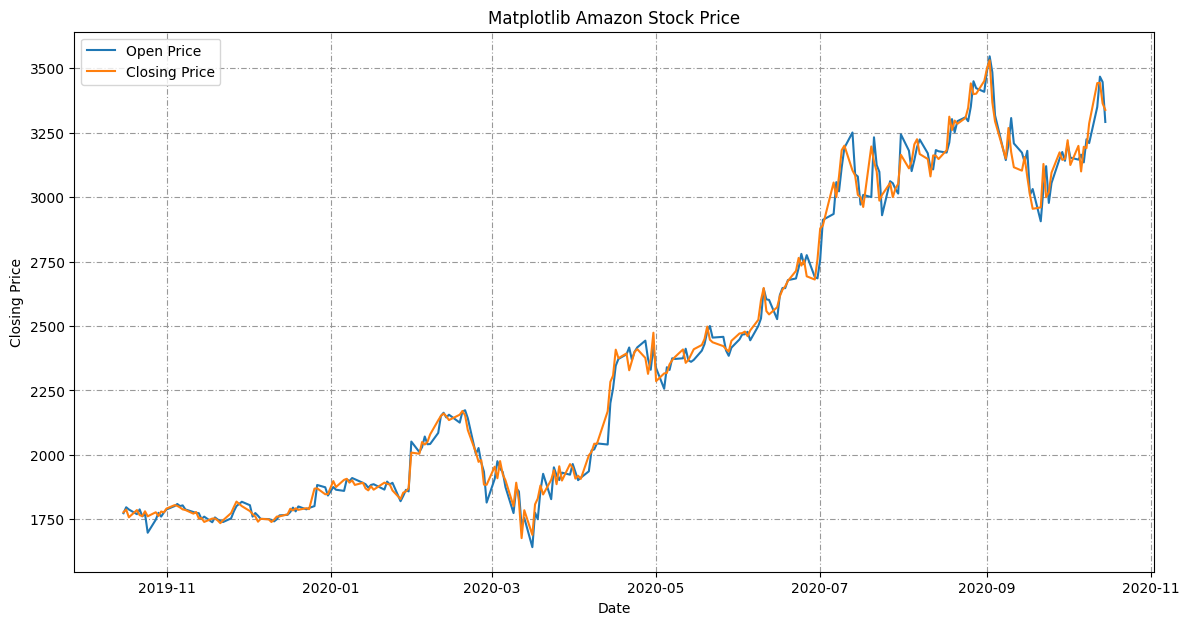

In [ ]:
# Matplotlib 
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Precios al cierre')
axes_1.set_title('Matplotlib Amazon Stock Price')
axes_1.plot(df_1.index, df_1['Open'], label='Precios apertura')
axes_1.plot(df_1.index, df_1['Close'], label='Precios al cierre')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

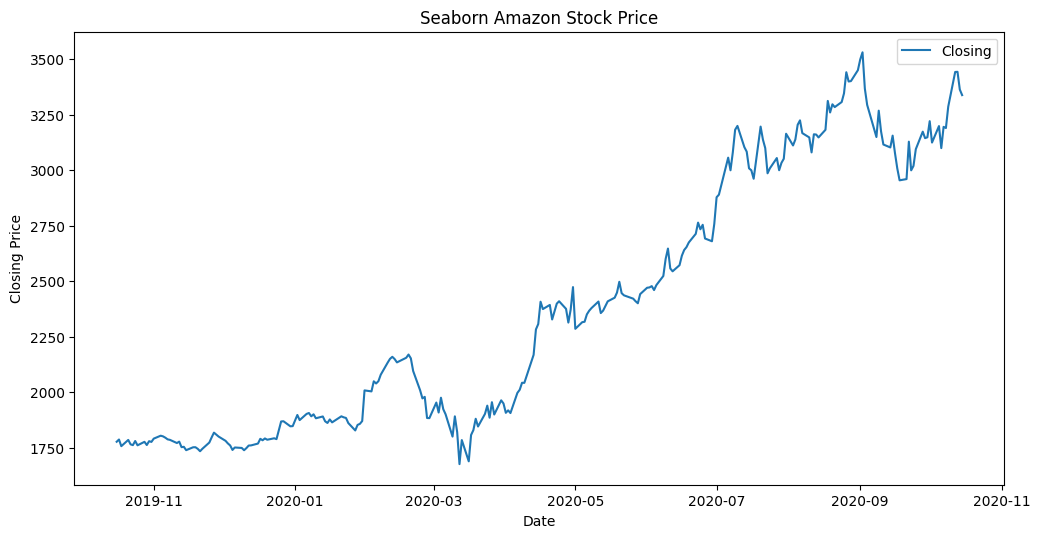

In [ ]:

# Seaborn
fig_3 = plt.figure(figsize=(12,6), dpi=100)
axes_2 = sns.lineplot(data=df_1, x=df_1.index, y="Close", label='Closing')
axes_2.set(xlabel='Date', ylabel='Closing Price')
axes_2.set_title('Seaborn Amazon Stock Price')
axes_2.legend(loc=0)
sns.set_style("darkgrid", {"axes_2.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


### Plotly

In [ ]:
# Plotly
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, y=df_1['Close'],
                    mode='lines',
                    name='Closing Price'))
fig_2.update_layout(
    xaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title='Date',
    yaxis_title='Closing Price',
    title='Plotly Amazon Stock Price'
)

### Matplotlib Finance

Nueva librería que usaremos. Es muy sencillo y con muchas posibilidades

In [ ]:
df_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-16,1773.33,1786.24,1770.52,1777.43,1777.43,2763400
2019-10-17,1796.49,1798.85,1782.02,1787.48,1787.48,2647400
2019-10-18,1787.80,1793.98,1749.20,1757.51,1757.51,3362500
2019-10-21,1769.66,1785.88,1765.00,1785.66,1785.66,2130400
2019-10-22,1788.15,1789.78,1762.00,1765.73,1765.73,2111700


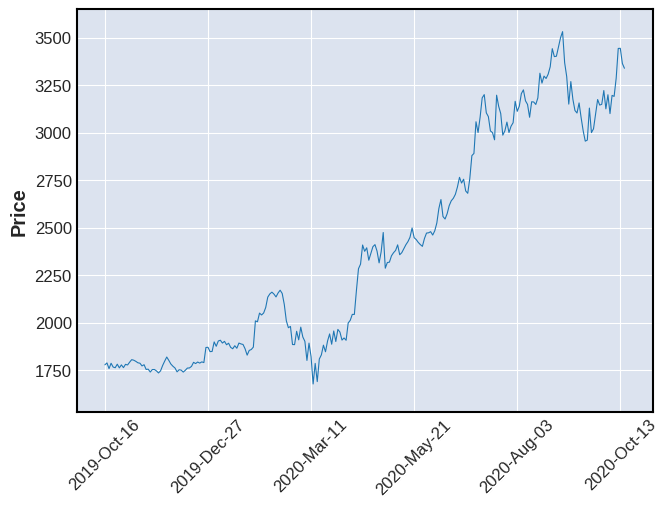

In [ ]:
mpf.plot(df_1, type='line')
# Empezamos con un ejemplo sencillo, eso sí, asume time y close price por defecto



Este es muy interesante y además permite coger diferentes valores, respecto al volumen

Lo de siempre --> practicad!!!

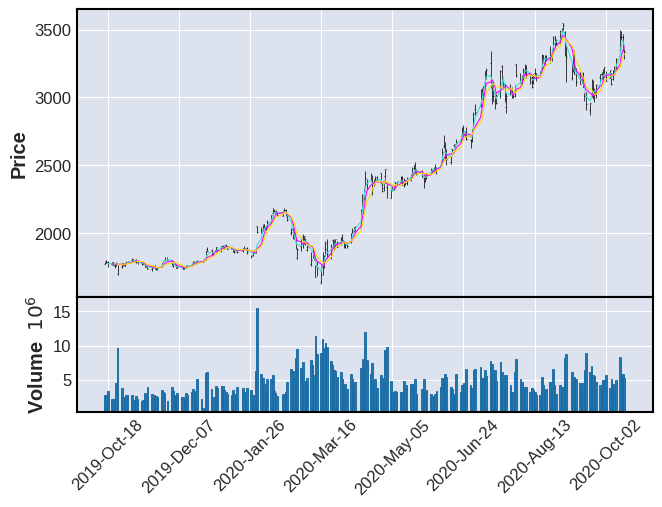

In [ ]:
# También se puede trazar múltiples líneas de valores promediando con diferentes días, 3, 5 y 7
mpf.plot(df_1, type='ohlc', mav=(3, 5, 7), volume=True, show_nontrading=True)

### Investiguemos en la opciones de trazado de periodos de tiempo y estilo

Todo esto se puede volver a copiar (a mí me cuesta memorizarlo)

de hecho es lo que se suele hacer

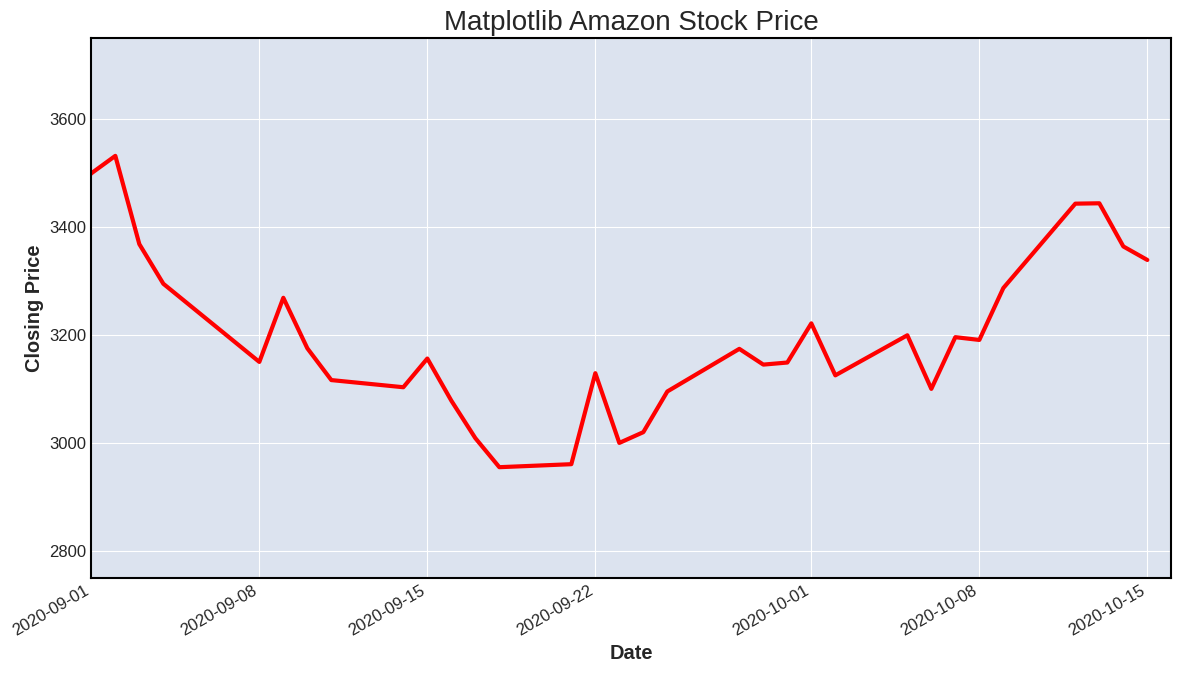

In [ ]:
fig_4 = plt.figure(figsize=(12,7), dpi=100)
ax_1 = fig_4.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Closing Price')
ax_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

# Matplotlib allows you to define time periods to plot
# You can style the line color, width, line style, and marker styling
df_1['Close'].plot(figsize=(12,6), 
                   xlim=['2020-09-01','2020-10-16'], 
                   ylim=[2750,3750],
                  color='red',
                  lw=3
                  #ls='-.'
                  )

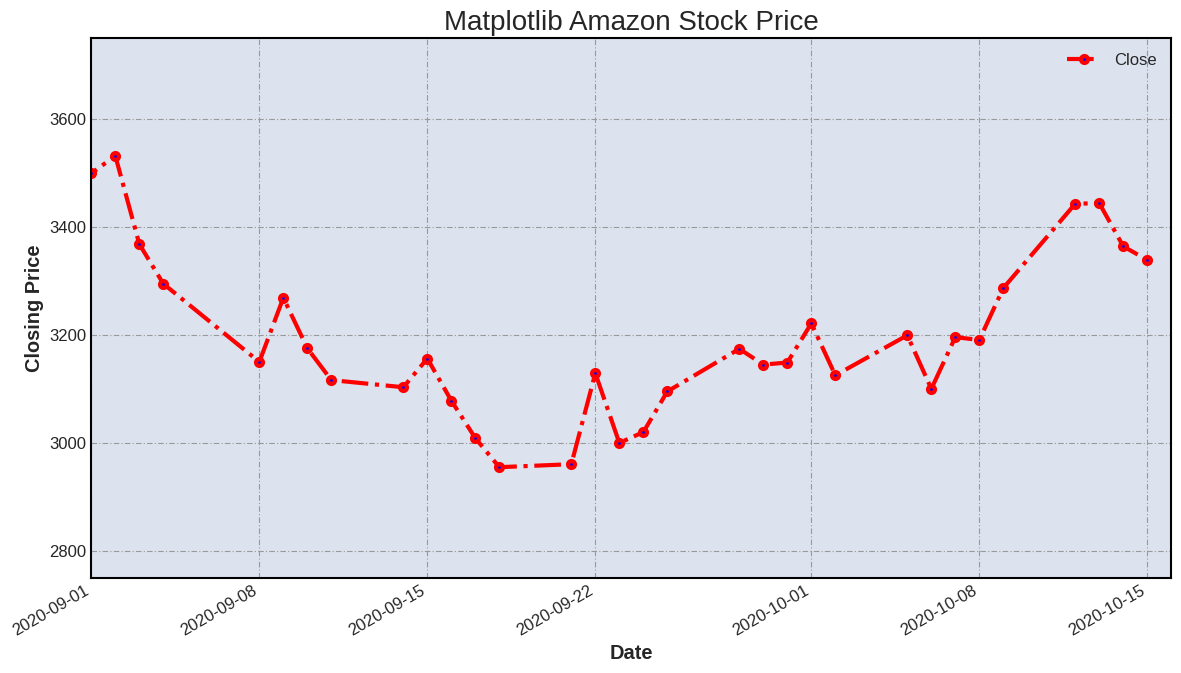

In [ ]:
fig_4 = plt.figure(figsize=(12,7), dpi=100)
ax_1 = fig_4.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Closing Price')
ax_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

# Matplotlib allows you to define time periods to plot
# You can style the line color, width, line style, and marker styling
df_1['Close'].plot(figsize=(12,6), 
                   xlim=['2020-09-01','2020-10-16'], 
                   ylim=[2750,3750],
                  color='red',
                  lw=3,
                  ls='-.',
                  marker='o', markersize=5, 
                   markerfacecolor='blue', 
                   markeredgecolor='red', markeredgewidth=3)
ax_1.legend(loc=0)
ax_1.grid(True, color='0.6', dashes=(5,2,1,2))

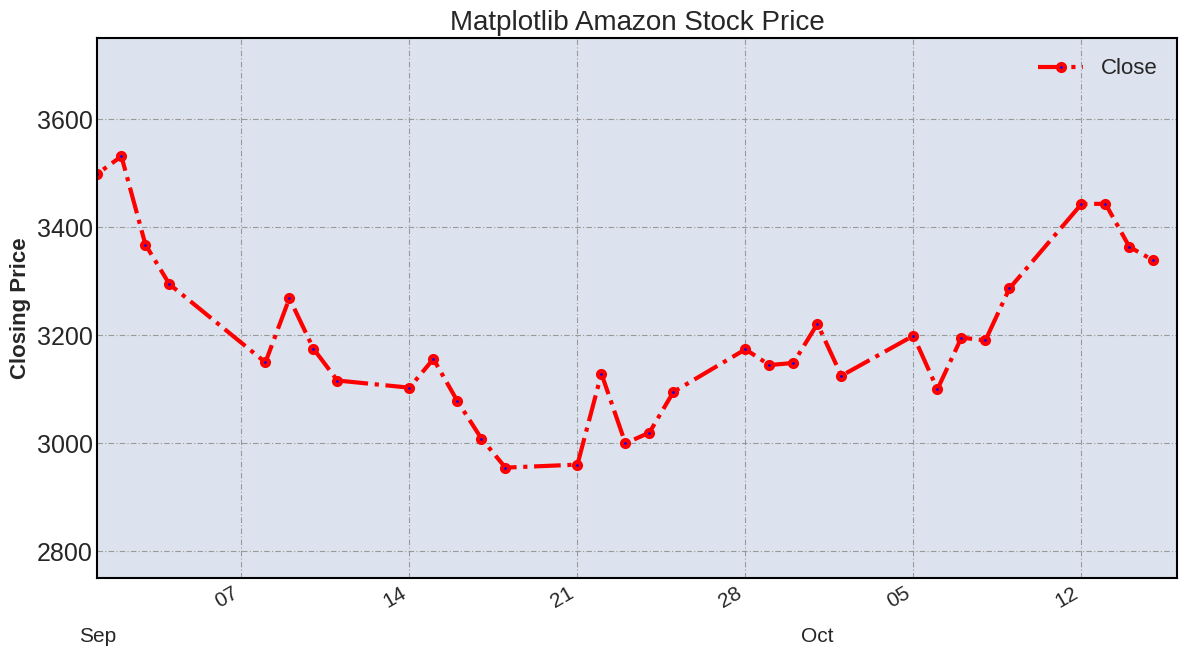

In [ ]:
fig_4 = plt.figure(figsize=(12,7), dpi=100)
ax_1 = fig_4.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Closing Price')
ax_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

# Matplotlib allows you to define time periods to plot
# You can style the line color, width, line style, and marker styling
df_1['Close'].plot(figsize=(12,6), 
                   xlim=['2020-09-01','2020-10-16'], 
                   ylim=[2750,3750],
                  color='red',
                  lw=3,
                  ls='-.',
                  marker='o', markersize=5, 
                   markerfacecolor='blue', 
                   markeredgecolor='red', markeredgewidth=3)
ax_1.legend(loc=0)
ax_1.grid(True, color='0.6', dashes=(5,2,1,2))

# Set tick font sizes
ax_1.tick_params(axis="x", labelsize=15)
ax_1.tick_params(axis="y", labelsize=18)

# Set axis label font sizes and turn off Date label
plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

# Set legend font size
plt.legend(loc=0, prop={'size': 16})

# Set the x axis to put ticks by week days
ax_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

# Set so that only month and day shows
# https://matplotlib.org/api/dates_api.html
# %Y - 4 digit year
# %y - 2 digit year
# %m - month as a number 
# %b - month as abbreviated name
# %d - day
# %a - abbreviated day
# ax_1.xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))

# We can also use major and minor locators
ax_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax_1.xaxis.set_minor_locator(dates.MonthLocator())
ax_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

# Change minor label font size
ax_1.tick_params(axis='both', which='minor', labelsize=15)

### Trends

# Una serie temporal contiene diferentes componentes como son tendencia, ciclo componente estacional, y resto (residuo). 

In [ ]:
def print_chart(csv, title, col):
    df_1 = pd.read_csv(csv, index_col='Date', parse_dates=True)
    f_1 = plt.figure(figsize=(12,6), dpi=100)
    ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
    ax_1.set_ylabel('Closing Price')
    ax_1.set_title(title)
    ax_1.plot(df_1.index, df_1[col])
    ax_1.grid(True, color='0.6', dashes=(5,2,1,2))
    ax_1.set_facecolor((0.9, 0.9, 0.9))
    



Tenemos tendencias conocidas como cíclicas, que es, a menudo, donde surgen nuevas ideas , generan un crecimiento, luego caen...

Normalmente es difícil encontrar un buen punto de entrada o punto de salida con estos, pero tienen una tendencia.

In [ ]:
print_chart('S&P.csv', 'S&P Prices', 'Close')

Como los datos de precios de CCL nos muestran tendencias horizontales, al alza o a la baja

In [ ]:
print_chart('CCL.csv', 'Carnival Cruise Prices', 'Close')

Southwest muestra un ejemplo de repetición de tendencias o estacionalidad.

El precio sube en junio, julio y diciembre y luego baja

In [ ]:
print_chart('LUV.csv', 'Southwest Prices', 'Close')

### Import Pittsburgh Weather

In [ ]:
df_2 = pd.read_csv('PittsburghWeather.csv', index_col='Date', parse_dates=True)
df_2 = df_2.dropna() # Drop any missing data
# Get data since 2000
df_3 = df_2[df_2.index>'2000-01-01']
df_3

,tmax,tmin,prcp
Date,,,
2000-01-02,66.0,42.0,0.04
2000-01-03,62.0,52.0,0.58
2000-01-04,56.0,31.0,0.54
2000-01-05,32.0,24.0,0.03
2000-01-06,43.0,22.0,0.00
...,...,...,...
2019-12-27,57.9,41.0,0.02
2019-12-28,46.9,37.9,0.00
2019-12-29,55.9,39.9,0.52


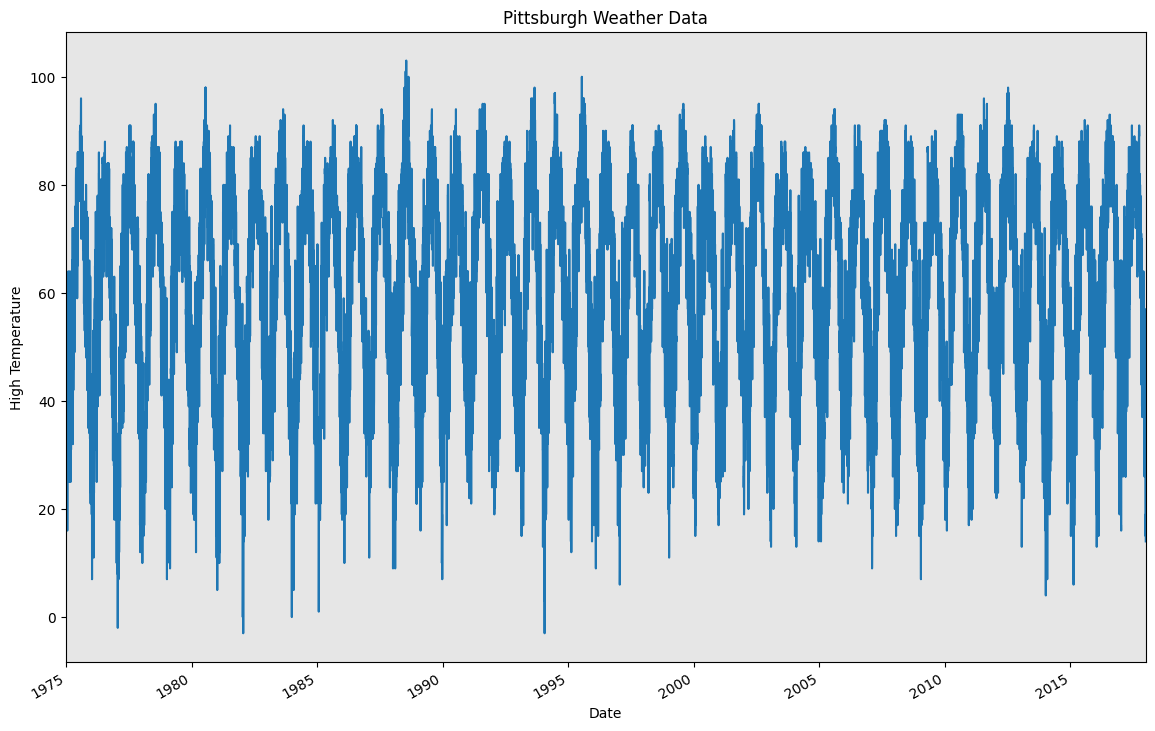

In [ ]:
f_2 = plt.figure(figsize=(12,7), dpi=100)
ax_2 = f_2.add_axes([0.0, 0.0, 0.9, 0.9])
ax_2.set_ylabel('High Temperature')
ax_2.set_title('Pittsburgh Weather Data')
df_2['tmax'].plot(xlim=['1974-12-21','2017-12-30'])
ax_2.set_facecolor((0.9, 0.9, 0.9))


Podemos hacerlo más claro

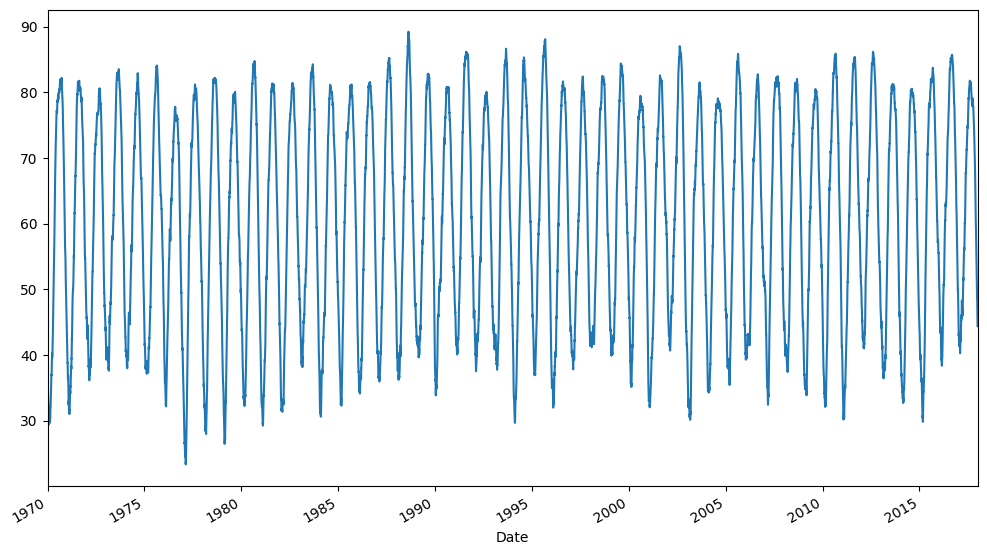

In [ ]:
f_2 = plt.figure(figsize=(12,7), dpi=100)

# Let's create a rolling mean average using average of 60 days of max temps
df_2.rolling(window=60).mean()['tmax'].plot(xlim=['1970-01-01','2017-12-30'])